**Этот ноутбук — упражнение из курса [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning).  Вы можете обратиться к учебному материалу по [этой ссылке](https://www.kaggle.com/ryanholbrook/deep-neural-networks).**

---


# Введение #

В учебном материале мы увидели, как строить глубокие нейронные сети, складывая слои внутри модели `Sequential`. Добавив *функцию активации* после скрытых слоёв, мы дали сети возможность изучать более сложные (нелинейные) зависимости в данных.

В этих упражнениях вы построите нейронную сеть с несколькими скрытыми слоями, а затем изучите некоторые функции активации помимо ReLU. Запустите следующую ячейку, чтобы всё подготовить!

In [1]:
import matplotlib.pyplot as plt

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

В наборе данных *Concrete* ваша задача — предсказать прочность на сжатие бетона, изготовленного по различным рецептам.

Запустите следующую ячейку кода без изменений, чтобы загрузить набор данных.

In [2]:
import pandas as pd

concrete = pd.read_csv('../dataset/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 1) Форма входных данных #

Целевая переменная для этой задачи — столбец `'CompressiveStrength'`. Остальные столбцы — это признаки, которые мы будем использовать в качестве входов.

Какой будет форма входа для этого набора данных?

In [3]:
# YOUR CODE HERE
input_shape = (8,)

# 2) Определите модель со скрытыми слоями #

Теперь создайте модель с тремя скрытыми слоями, каждый по 512 единиц и с активацией ReLU. Обязательно включите выходной слой с одной единицей и без активации, а также укажите `input_shape` как аргумент первого слоя.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3) Слои активации #

Давайте немного исследуем функции активации.

Обычный способ добавить функцию активации к слою `Dense` — указать её в определении через аргумент `activation`. Однако иногда вам понадобится поместить какой-то другой слой между слоем `Dense` и его функцией активации. (Пример этого мы увидим в Уроке 5 с *batch normalization*.) В таком случае можно определить активацию в отдельном слое `Activation`, вот так:

```
layers.Dense(units=8),
layers.Activation('relu')
```

Это полностью эквивалентно обычному способу: `layers.Dense(units=8, activation='relu')`.

Перепишите следующую модель так, чтобы каждая активация была в своём отдельном слое `Activation`.

In [5]:
### YOUR CODE HERE: rewrite this to use activation layers
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Необязательно: альтернативы ReLU #

Существует целое семейство вариантов активации `'relu'` — `'elu'`, `'selu'`, `'swish'` и другие — все они доступны в Keras. Иногда одна активация может работать лучше другой на конкретной задаче, поэтому по мере разработки модели можно экспериментировать с активациями. Активация ReLU обычно хорошо подходит для большинства задач, так что с неё стоит начать.

Посмотрим на графики некоторых из них. Измените активацию с `'relu'` на одну из перечисленных выше. Затем запустите ячейку, чтобы увидеть график. (Больше идей можно найти в [документации](https://www.tensorflow.org/api_docs/python/tf/keras/activations).)

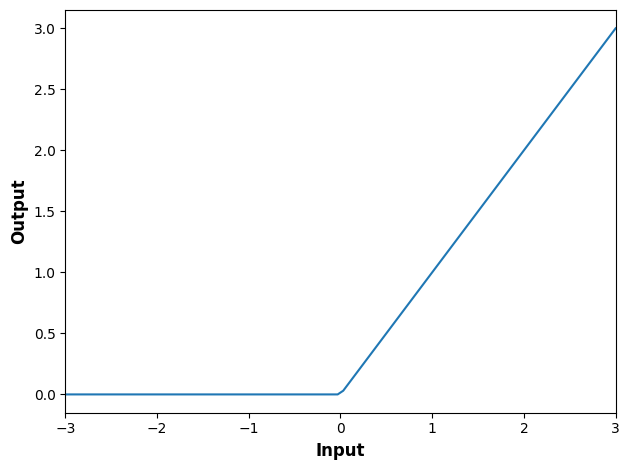

In [6]:
import tensorflow as tf
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# Продолжайте #

Теперь переходите к Уроку 3 и [**узнайте, как обучать нейронные сети**](https://www.kaggle.com/ryanholbrook/stochastic-gradient-descent) с помощью стохастического градиентного спуска.

---




*Есть вопросы или комментарии? Загляните на [форум обсуждения курса](https://www.kaggle.com/learn/intro-to-deep-learning/discussion), чтобы пообщаться с другими учащимися.*